### Importing libraries and modules

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sqlite3
sns.set(rc={'figure.figsize':(11.7,8.27)})
pd.options.display.float_format = '{:40,.0f}'.format

### Importing the data

In [2]:
conn = sqlite3.connect('autovit.db')
raw_data = pd.read_sql_query('SELECT * FROM autovit_db', conn)

#### Let's look at the data right after import

In [3]:
display(raw_data.head())
display(raw_data.describe(include='all'))
display(raw_data.isnull().sum())

,Make,Model,Version,Body_style,Year,Mileage,Engine_size,Fuel,Horsepower,Polution_standard,...,Drivetrain,Condition,No_accident,Service_history,Registered_in_RO,Country_of_origin,Seller,Price,Currency,Location
0,\n Audi,\n A3,n,\n Masina de oras,2005,\n 199 494 km,\n 1 600 cm3,\n Benzina,\n 116 CP,\n Euro 4,...,\n Fata,\n Second hand,\n Da,\n Da,n,\n Germania,\n Firma,4 299,EUR,\n ...
1,\n Nissan,\n Juke,n,\n SUV,2013,\n 65 445 km,\n 1 598 cm3,\n Benzina,\n 117 CP,\n Euro 5,...,\n Fata,\n Second hand,n,\n Da,\n Da,\n Germania,\n Firma,10 250,EUR,\n ...
2,\n Suzuki,\n Swift,n,\n Masina de oras,2010,\n 144 000 km,\n 1 300 cm3,\n Benzina,\n 80 CP,\n Euro 4,...,\n Fata,\n Second hand,\n Da,\n Da,n,\n Germania,\n Firma,3 999,EUR,\n ...
3,\n Mazda,\n CX-5,n,\n SUV,2014,\n 154 288 km,\n 2 200 cm3,\n Diesel,\n 150 CP,\n Euro 6,...,\n Fata,\n Second hand,\n Da,\n Da,n,\n Italia,\n Firma,11 700,EUR,\n ...
4,\n Mitsubishi,\n ASX,n,\n SUV,2012,\n 162 000 km,\n 1 800 cm3,\n Diesel,\n 115 CP,\n Euro 5,...,\n Fata,\n Second hand,\n Da,\n Da,n,\n Belgia,\n Firma,8 900,EUR,\n ...


,Make,Model,Version,Body_style,Year,Mileage,Engine_size,Fuel,Horsepower,Polution_standard,...,Drivetrain,Condition,No_accident,Service_history,Registered_in_RO,Country_of_origin,Seller,Price,Currency,Location
count,15992,15992,15992,15992,"15,992",15992,15992,15992,15992,15992,...,15992,15992,15992,15992,15992,15992,15992,15992,15992,15992
unique,66,588,228,9,nan,6224,476,6,357,8,...,5,2,2,2,2,25,2,4249,2,1203
top,\n Volkswagen,\n Passat,n,\n SUV,nan,\n 1 km,\n 1 968 cm3,\n Diesel,n,\n Euro 6,...,\n Fata,\n Second hand,\n Da,\n Da,n,n,\n Firma,5 990,EUR,\n ...
freq,2347,686,10335,5022,nan,412,1337,12194,1662,6507,...,6365,15191,10768,10074,10357,6047,10354,93,15967,727
mean,NaN,NaN,NaN,NaN,"2,013",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,"1,938",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,"2,010",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,"2,014",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,"2,017",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Make                 0
Model                0
Version              0
Body_style           0
Year                 0
Mileage              0
Engine_size          0
Fuel                 0
Horsepower           0
Polution_standard    0
Transmission         0
Drivetrain           0
Condition            0
No_accident          0
Service_history      0
Registered_in_RO     0
Country_of_origin    0
Seller               0
Price                0
Currency             0
Location             0
dtype: int64

As we can see, the scrapped added a \n to almost every field.
Furthermore, all fields except year are treated as strings and no numeric operations can be performed.
Lastly, it appears no fields have missing values since the scrapper populated with either the scrapped value or 'n'.
We can fix all of this quite easily by :
- removing the '\n' characters 
- removing the 'km', 'CP' and 'cm3' strings, enabling us to perform some numeric analysis on the Mileage, Power and Engine Size columns
- replacing the 'n' character with the NaN (missing value) idnetifier

In [4]:
#remove colmnus with little relevant info, badly inputed
# raw_data1 = raw_data.drop(['Version', 'No_accident','Service_history'], axis=1)

raw_data1 = raw_data

#Remove strings and extra spaces from number fields
raw_data1 = raw_data1.replace(['\n', 'km', 'CP', 'cm3','\s\s+'],'', regex=True)

#replacing 'n' with 'nan' to identify missing values
raw_data1 = raw_data1.replace('n',np.nan, regex=False)
# raw_data1['Drivetrain'] = raw_data1['Drivetrain'].replace('n',np.nan, regex=False)

#Remove spaces from numeric columns so to_numeric can work
cols = ['Mileage','Engine_size','Horsepower','Price']
raw_data1[cols] = raw_data1[cols].replace(' ','', regex=True)
raw_data1[cols] = raw_data1[cols].apply(pd.to_numeric, errors='coerce')


In [5]:
display(raw_data1.head())
display(raw_data1.describe(include='all'))
display(raw_data1.isnull().sum())

,Make,Model,Version,Body_style,Year,Mileage,Engine_size,Fuel,Horsepower,Polution_standard,...,Drivetrain,Condition,No_accident,Service_history,Registered_in_RO,Country_of_origin,Seller,Price,Currency,Location
0,Audi,A3,NaN,Masina de oras,2005,"199,494","1,600",Benzina,116,Euro 4,...,Fata,Second hand,Da,Da,NaN,Germania,Firma,4299,EUR,CALEA LUGOJULUI NR. 8(LangaHOTEL MOTICICA ) - ...
1,Nissan,Juke,NaN,SUV,2013,"65,445","1,598",Benzina,117,Euro 5,...,Fata,Second hand,NaN,Da,Da,Germania,Firma,10250,EUR,"Sos. Pipera 50A, Sector 2, Bucuresti - 014132 ..."
2,Suzuki,Swift,NaN,Masina de oras,2010,"144,000","1,300",Benzina,80,Euro 4,...,Fata,Second hand,Da,Da,NaN,Germania,Firma,3999,EUR,"Str. Ovidiu Balea, la intrare in Sacalaz - 300..."
3,Mazda,CX-5,NaN,SUV,2014,"154,288","2,200",Diesel,150,Euro 6,...,Fata,Second hand,Da,Da,NaN,Italia,Firma,11700,EUR,"Soseaua Baldovinesti, Nr. 16 - 810175 Braila, ..."
4,Mitsubishi,ASX,NaN,SUV,2012,"162,000","1,800",Diesel,115,Euro 5,...,Fata,Second hand,Da,Da,NaN,Belgia,Firma,8900,EUR,"Soseaua Baldovinesti, Nr. 16 - 810175 Braila, ..."


,Make,Model,Version,Body_style,Year,Mileage,Engine_size,Fuel,Horsepower,Polution_standard,...,Drivetrain,Condition,No_accident,Service_history,Registered_in_RO,Country_of_origin,Seller,Price,Currency,Location
count,15992,15992,5657,15992,"15,992","15,929","14,688",15992,"14,330",12932,...,13252,15992,10768,10074,5635,9945,15992,"15,992",15992,15992
unique,66,588,227,9,nan,nan,nan,6,nan,7,...,4,2,1,1,1,24,2,nan,2,1203
top,Volkswagen,Passat,III,SUV,nan,nan,nan,Diesel,nan,Euro 6,...,Fata,Second hand,Da,Da,Da,Germania,Firma,nan,EUR,"Calea Bucurestilor Nr. 95-97 - 075100 Otopeni,..."
freq,2347,686,430,5022,nan,nan,nan,12194,nan,6507,...,6365,15191,10768,10074,5635,5632,10354,nan,15967,727
mean,NaN,NaN,NaN,NaN,"2,013","133,182","2,064",NaN,174,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"21,848",NaN,NaN
std,NaN,NaN,NaN,NaN,5,"92,287",651,NaN,83,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"185,971",NaN,NaN
min,NaN,NaN,NaN,NaN,"1,938",1,599,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
25%,NaN,NaN,NaN,NaN,"2,010","59,000","1,598",NaN,116,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,150",NaN,NaN
50%,NaN,NaN,NaN,NaN,"2,014","145,000","1,991",NaN,150,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"12,150",NaN,NaN
75%,NaN,NaN,NaN,NaN,"2,017","196,500","2,145",NaN,195,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"25,556",NaN,NaN


Make                     0
Model                    0
Version              10335
Body_style               0
Year                     0
Mileage                 63
Engine_size           1304
Fuel                     0
Horsepower            1662
Polution_standard     3060
Transmission          1280
Drivetrain            2740
Condition                0
No_accident           5224
Service_history       5918
Registered_in_RO     10357
Country_of_origin     6047
Seller                   0
Price                    0
Currency                 0
Location                 0
dtype: int64

### Exploratory analysis 

Let's quickly explore the data, column by column, so we can get a better understanding of what we have to work with before we proceed with the cleaning.

#### Column: Make

['Audi' 'Nissan' 'Suzuki' 'Mazda' 'Mitsubishi' 'Mercedes-Benz'
 'Volkswagen' 'BMW' 'Dacia' 'Renault' 'Peugeot' 'Toyota' 'Škoda' 'Volvo'
 'Jaguar' 'Citroën' 'Opel' 'Land Rover' 'Porsche' 'Hyundai' 'Lancia'
 'Chevrolet' 'Ford' 'Honda' 'Smart' 'Fiat' 'Bentley' 'Kia' 'Jeep' 'Seat'
 'Alfa Romeo' 'Mini' 'Infiniti' 'Subaru' 'Cadillac' 'MG' 'Lexus' 'Maybach'
 'Tesla' 'SsangYong' 'Saab' 'Maserati' 'Daihatsu' 'Isuzu' 'Aixam' 'Dodge'
 'ABARTH' 'Ferrari' 'Daewoo' 'Aston Martin' 'Chrysler' 'Autobianchi'
 'Asia' 'Rolls-Royce' 'McLaren' 'Tata' 'Iveco' 'Lamborghini' 'Hummer'
 'Rover' 'Altul' 'Pontiac' 'Aro' 'Austin' 'Lada' 'Lincoln']


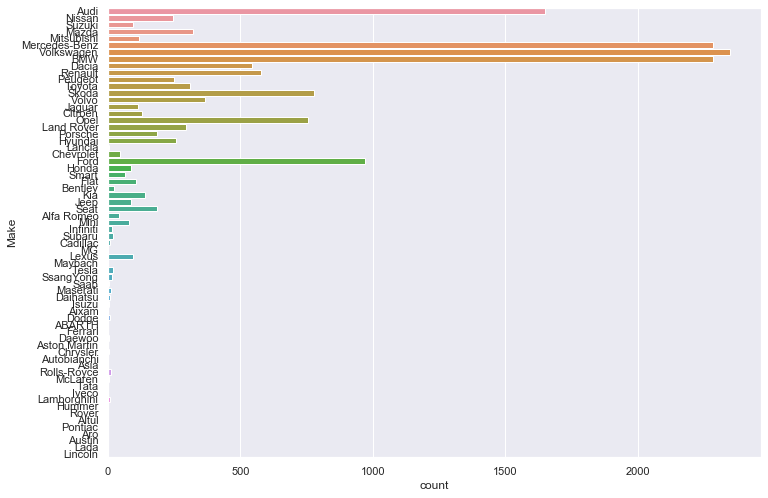

In [6]:
print (raw_data1['Make'].unique())
display(sns.countplot(y=raw_data1['Make'],orient='v'))

No missing values.

Looking at the unique values in the 'Make' column we can see a decent selection of makes, ranging from budget brands such as Kia, all the way up to ultra-luxury ones like Ferrari while containing some odd brands like Isuzu. We can also see an entry for 'Altul' which translates to 'Other'. We can make a note to remove entries like this as they don't add much to the analysis.

#### Column: Model

['A3' 'Juke' 'Swift' 'CX-5' 'ASX' 'C' 'Passat' 'GL' 'X1' 'Sandero Stepway'
 'Captur' '508' 'Tiguan' 'RAV-4' 'Seria 3' 'Octavia' 'XC 60' 'Micra' 'XE'
 'A5' 'Outlander' 'Golf' 'A4' 'Sharan' 'Superb' 'Caravelle' 'Phaeton' 'X6'
 'C4' 'Astra' 'Seria 5' 'Discovery' 'Cayenne' 'Duster' 'Seria 6' 'Touareg'
 'X3' '308' 'Megane' 'Tucson' 'Insignia' 'RS6' 'ix35' 'Range Rover Sport'
 'C-Crosser' 'S60' 'Espace' '6' 'XF' 'Thema' '3' 'Jetta' 'Seria 1'
 'GLE Coupe' 'Captiva' 'Range Rover Evoque' 'Transit' 'A1' 'A8' 'S' 'X4'
 'Seria 4' 'Octavia RS' 'Q8' 'A6' 'Focus' 'E' 'V40' 'Mondeo' 'Fabia'
 'Passat CC' 'Civic' 'A' 'Touran' 'Seria 7' 'Qashqai' 'X5' 'Clio' 'Zafira'
 'Multivan' 'Fortwo' 'Doblo' 'T6' 'GLC' 'Avensis' 'Bentayga' 'F-Pace' 'Q3'
 'Q5' 'Ranger' 'S-Max' 'Kuga' '500' 'Picanto' 'M' 'Seria 2'
 'Grand Cherokee' 'C-HR' 'X' 'Polo' 'Amarok' 'Caddy' 'C-MAX' 'Scenic'
 'A6 Allroad' 'Santa Fe' 'V40 CC' 'Antara' 'XC 90' '2' 'Fiesta' 'Q7'
 'Aveo' 'Corsa' 'Eos' '5' 'A7' 'V90' 'Golf GTI' 'Bora' 'Logan' 'Altea

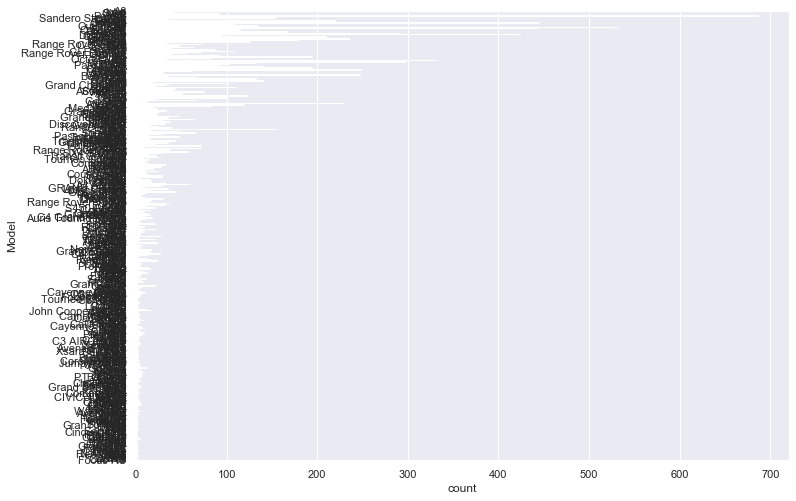

In [7]:
print (raw_data1['Model'].unique())
display(sns.countplot(y=raw_data1['Model'],orient='v'))

No missing values.

The model column is a bit more diverse and we can start to see some possible problems for our analysis. Some entries contain more than just the model name, adding the make or specific version/trim level. 

#### Column: Version

In [8]:
print (raw_data1['Version'].unique())

[nan '250 d' 'B8' 'GL 350' 'IV' '320' 'III' 'K13' 'VII' 'VI' 'J'
 'Gran Coupe' '318' 'B7' '350' 'A6' '116' '640' '220 d' '220 d T-Modell'
 '120' '450' '3GT' 'V' 'H' 'B9' '330' '200 d' 'B6' '518' 'Mk4' 'VIII'
 '740' '118' '200' '180' '435' 'C7' '250' '750' '2012-' '250 4M' 'K' 'C6'
 'ML 250' 'ML 350' '200 d T-Modell' 'II' 'Mk3' 'Saloon' '525' '520' 'D4'
 '5GT (F07)' 'Mk7' '2003-2012' 'X' '535' '420' 'C 320' '270' 'GLK 220'
 '400' '730' 'Mk2' 'Mk6' 'MCV' '350 d' 'Mk5' 'Scout' 'ST' '335' '540'
 '63 AMG' 'AMG C 63 S Coupe' 'G' 'T5' 'D' 'ML 320' 'Coupe' 'I' 'FR' 'F10'
 '200 Coupe' '325' 'E' '180 d' '350 CDI Avantgarde' '530' '500'
 '220 d Coupe' 'Tour' 'ML 63 AMG' 'IV FL' '328' '550' 'C' 'B'
 '350 long AMG' '300' 'ActiveHybrid 3' 'X6M' 'V 250' '250 d T-Modell'
 '220' '316' 'AMG 63 S Coupe' '170' '220 d 4M' 'D-OPC' '45 AMG 4M' '428'
 'V 220' 'M5' '2' '250 D 4M' '200 T-Modell' '530GT' 'T4' 'COUNTRY TURER'
 'AMG 55' 'AMG 63' 'ML 280' 'B5 FL' 'ML 270' '350 d 4M' 'A2' 'RX450'
 '250 Coupe' 'Cupra

Again, some possible problems since the same meaning can be extracted from multiple entries, for example MK3 and III. Also, this column presents more the 10k missing values.

#### Column: Body style

['Masina de oras' 'SUV' 'Sedan' 'Compacta' 'Combi' 'Coupe' 'Monovolum'
 'Masina mica' 'Cabrio']


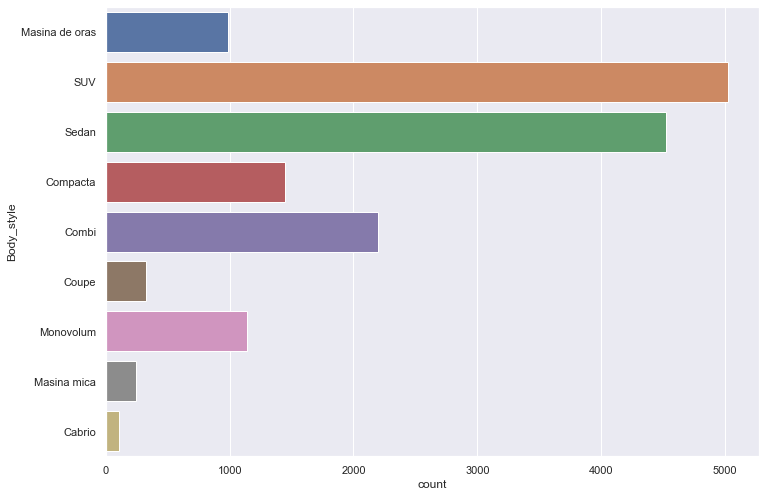

In [9]:
print (raw_data1['Body_style'].unique())
display(sns.countplot(y=raw_data1['Body_style'],orient='v'))

As this column has relatively few possible values and no missing values so can prove insightfull for the analysis.

#### Column: Year

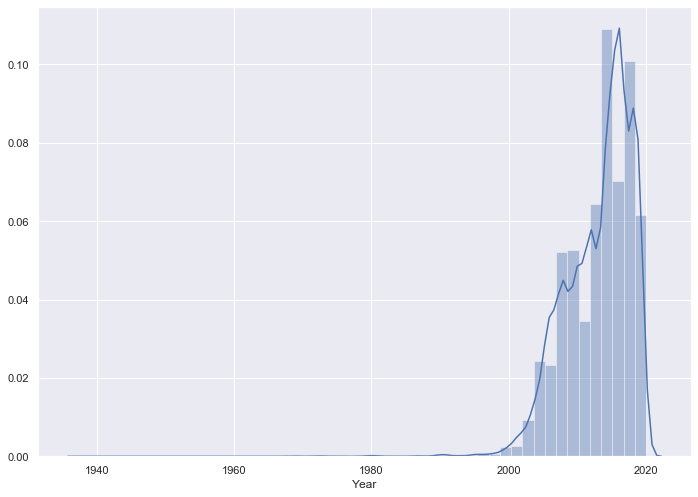

In [10]:
sns.distplot(raw_data1['Year'])

Seeing the car age distribution we can observe that most of the cars for sale were manufactured after 2000. An interesting comparison would be among different countries, to see the average/median age of cars for sale (e.g. germany vs. bulgaria)

#### Column: Mileage

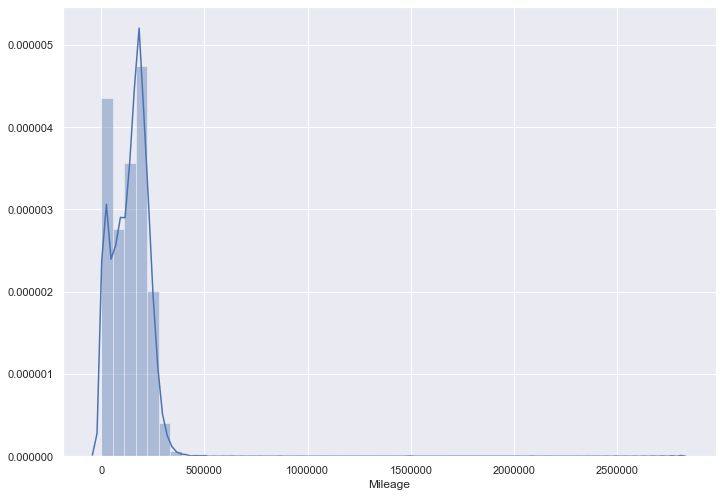

In [11]:
sns.distplot(raw_data1['Mileage'].dropna())

The mileage column has missing values therefore dropping these values is required. Further investigation is needed to propperly asses how to handle these values, are they missing because the car is new, therefore 0 miles or is there another reason ?

#### Column: Engine size

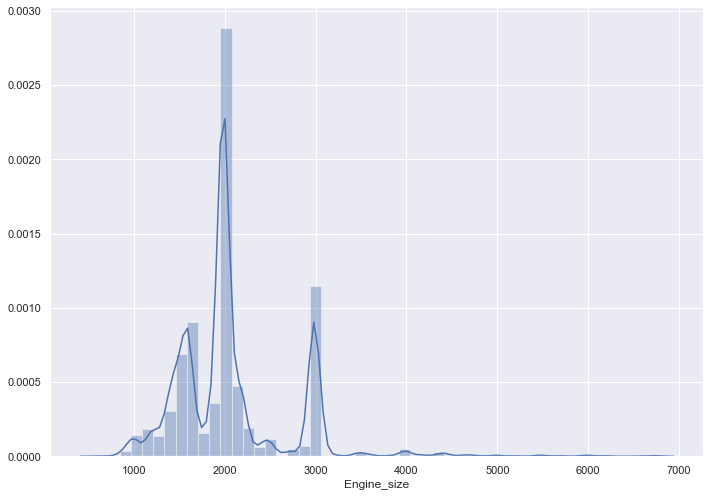

In [12]:
sns.distplot(raw_data1['Engine_size'].dropna())

Engine size column presents same problem as mileage with missing values, but we can certainly say that these were ommited by the seller. It seems the most popular sizes for engines are 1.5/1.6, 1.9/2.0 and 3.0

#### Column: Fuel

['Benzina' 'Diesel' 'Hibrid' 'Benzina + GPL' 'Electric' 'Benzina + CNG']


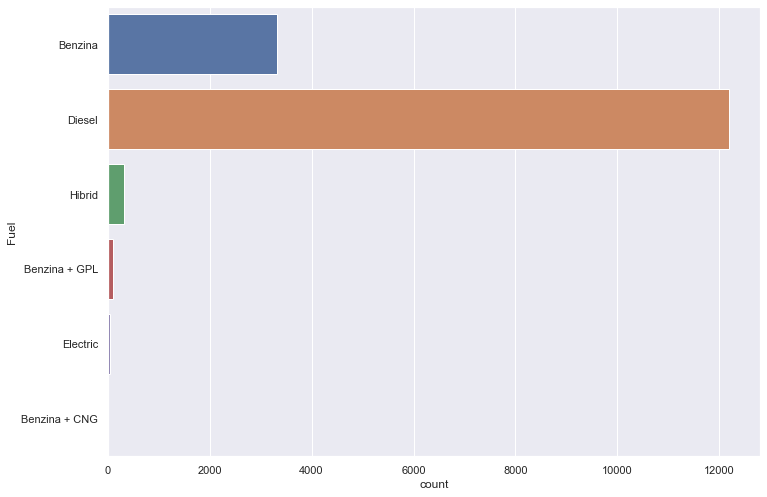

In [13]:
print (raw_data1['Fuel'].unique())
display(sns.countplot(y=raw_data1['Fuel'],orient='v'))

It looks like fuel can be a good differentiatior

#### Column: Horsepower

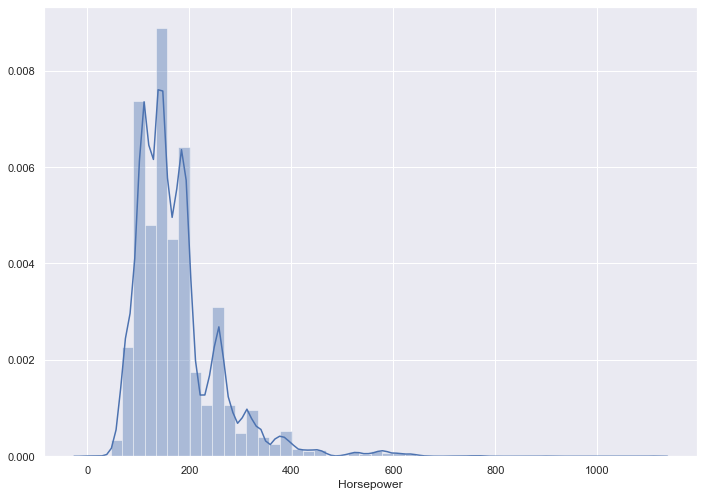

In [14]:
sns.distplot(raw_data1['Horsepower'].dropna())

Engine size column presents same problem as mileage with missing values, but we can certainly say that these were ommited by the seller. Missing values could be removed

#### Column: Polution standard

['Euro 4' 'Euro 5' 'Euro 6' nan 'Euro 3' 'Euro 1' 'Euro 2' 'Non-euro']


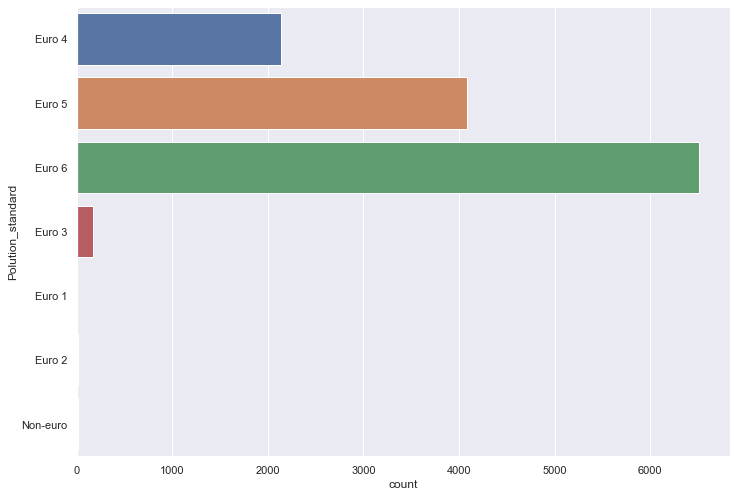

In [15]:
print (raw_data1['Polution_standard'].unique())
display(sns.countplot(y=raw_data1['Polution_standard'],orient='v'))

3060 missing values here. It could be deduced based on make, model, year, engine size but it is beyond the scope of this analysis. Missing values could be removed.

#### Column: Transmission 

['Manuala' 'Automata (CVT)' 'Automata' nan 'Automata (dublu ambreiaj)'
 'Semi-automata (secventiala)']


Semi-automata (secventiala)      18
Automata (CVT)                  191
Automata (dublu ambreiaj)       428
Manuala                        6331
Automata                       7744
Name: Transmission, dtype: int64

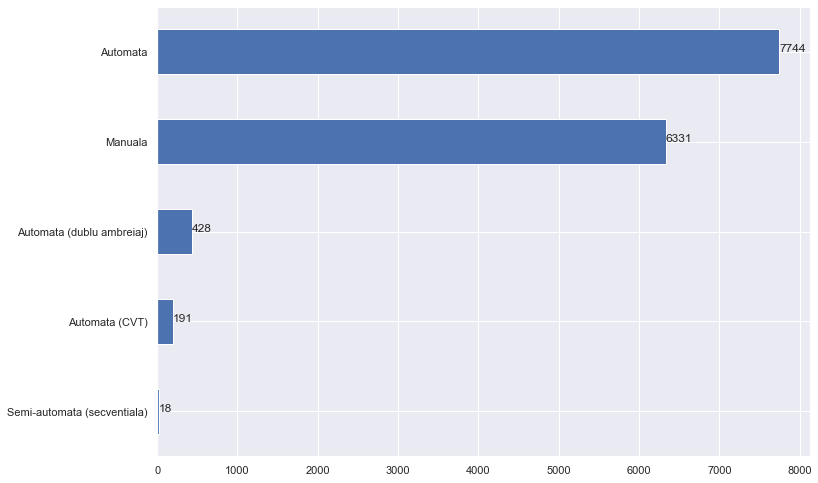

In [16]:
print (raw_data1['Transmission'].unique())
ax = raw_data1['Transmission'].value_counts(ascending=True).plot(kind="barh")
for p in ax.patches:
    b = p.get_bbox()       
    ax.annotate(int(b.x1), ((b.x0 + b.x1), (b.y0 + b.y1)/2))
display(raw_data1['Transmission'].value_counts(ascending=True))

Some missing values as well that could be removed. Also, some categories can be grouped together.

####  Column: Drivetrain

['Fata' '4x4 (automat)' nan 'Spate' '4x4-manual']


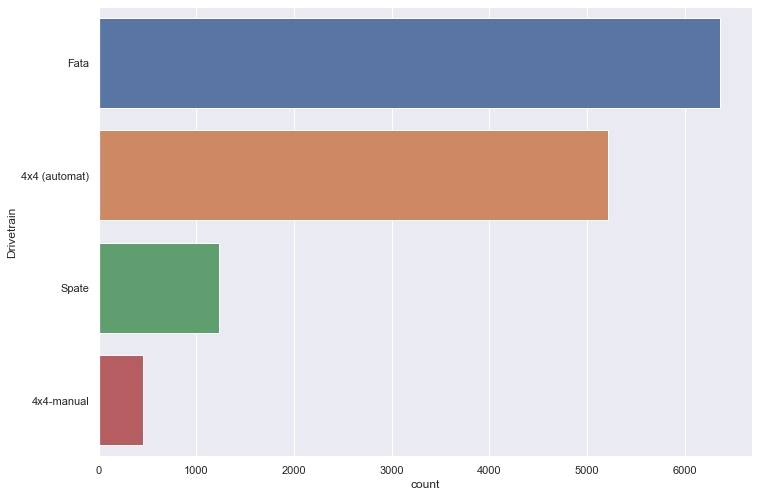

In [17]:
print (raw_data1['Drivetrain'].unique())
display(sns.countplot(y=raw_data1['Drivetrain'],orient='v'))

Some missing values as well that could be removed. Also, some categories can be grouped together.

#### Column: Condition 

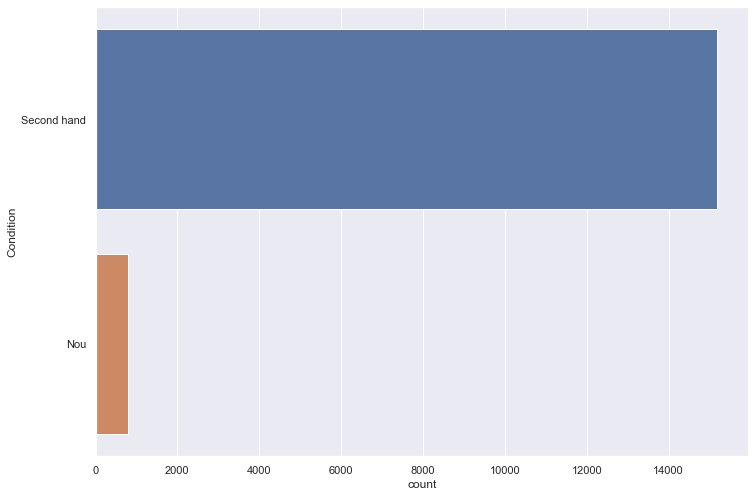

In [18]:
display(sns.countplot(y=raw_data1['Condition'],orient='v'))

comment

#### Column: No accident

In [19]:
raw_data1['No_accident'].value_counts()

Da    10768
Name: No_accident, dtype: int64

This shows the number of cars with confirmed 'no accident' on their records. We cannot assume that all other cars have an accident on their record as this is an optional field. We can consider to discard the column altogeher

#### Column: Service history 

In [20]:
raw_data1['Service_history'].value_counts()

Da    10074
Name: Service_history, dtype: int64

This shows the number of cars with confirmed service histories. We can assume that all other cars do not have an official history therefore can be less trustworthy.

#### Column: Registered in RO

In [21]:
raw_data1['Registered_in_RO'].value_counts()

Da    5635
Name: Registered_in_RO, dtype: int64

This shows the number of cars registered in Romania. They are not subjected to an extra tax for registering but have also been driven on the bad roads of Romania.

#### Column: Country of origin

['Germania' 'Italia' 'Belgia' nan 'Olanda' 'Romania' 'Luxemburg' 'Franta'
 'Austria' 'Statele Unite ale Americii' 'Polonia' 'Spania' 'Suedia'
 'Republica Ceha' 'Regatul Unit' 'Elvetia' 'Grecia' 'Danemarca' 'Slovacia'
 'Japonia' 'Ungaria' 'Irlanda' 'Turcia' 'Bulgaria' 'Rusia']


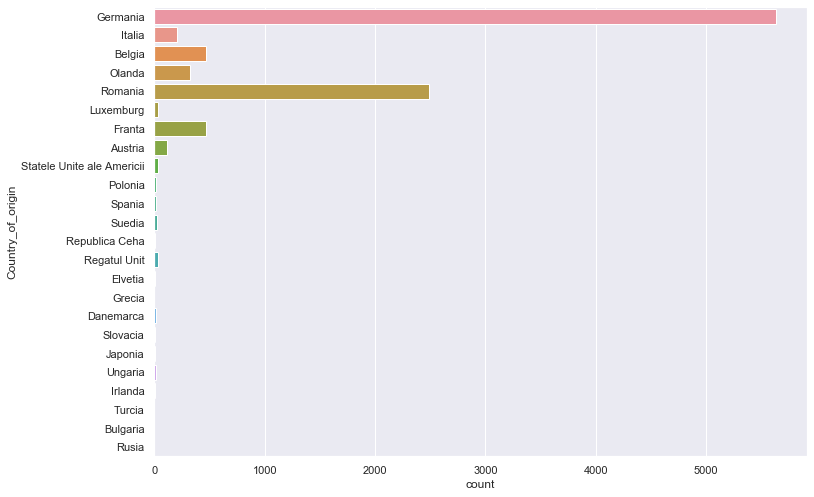

In [22]:
print (raw_data1['Country_of_origin'].unique())
display(sns.countplot(y=raw_data1['Country_of_origin'],orient='v'))

comment

#### Column: Seller

['Firma' 'Proprietar']


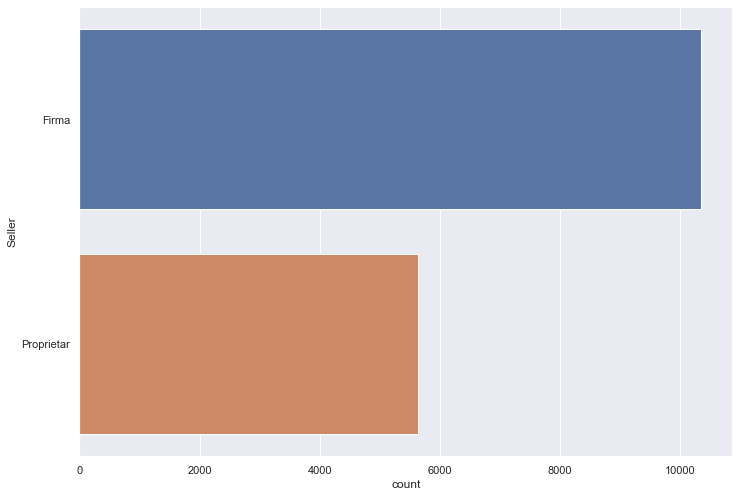

In [23]:
print (raw_data1['Seller'].unique())
display(sns.countplot(y=raw_data1['Seller'],orient='v'))

#### Column Price 

,Make,Model,Version,Body_style,Year,Mileage,Engine_size,Fuel,Horsepower,Polution_standard,...,Drivetrain,Condition,No_accident,Service_history,Registered_in_RO,Country_of_origin,Seller,Price,Currency,Location
5518,Mercedes-Benz,GLE,NaN,SUV,2018,"8,100","2,987",Diesel,258,NaN,...,4x4 (automat),Second hand,NaN,NaN,NaN,NaN,Firma,1,EUR,"MireseiNr. 5 - 300642 Timisoara, Judet Timis (..."
5257,Opel,Vectra,B,Sedan,1995,"337,392","1,600",Benzina + GPL,nan,NaN,...,Fata,Second hand,NaN,NaN,Da,Belgia,Firma,350,EUR,"str Toma Socolescu nr 33 - 10000 Paulesti, Jud..."
10807,Fiat,Marea,NaN,Monovolum,2000,"150,000","1,747",Benzina,nan,NaN,...,NaN,Second hand,NaN,NaN,Da,Italia,Proprietar,399,EUR,"Otopeni, Judet Bucuresti - Ilfov"
13297,BMW,Seria 3,320,Coupe,2002,"1,500,000","2,000",Benzina,nan,NaN,...,NaN,Second hand,NaN,NaN,NaN,NaN,Proprietar,450,EUR,"Bucuresti, Judet Bucuresti, Sectorul 2"
11424,Dacia,Solenza,NaN,Sedan,2004,"100,500","1,390",Benzina,nan,NaN,...,Fata,Second hand,NaN,NaN,Da,Romania,Proprietar,550,EUR,"Osorhei, Judet Bihor"
10472,Renault,Megane,I,Masina de oras,2001,"180,000","1,600",Benzina,nan,Euro 4,...,Fata,Second hand,NaN,NaN,NaN,NaN,Proprietar,590,EUR,"Ploiesti, Judet Prahova"
10669,Audi,A6,C5,Sedan,2002,"180,900","2,200",Benzina,nan,NaN,...,NaN,Second hand,NaN,NaN,Da,NaN,Proprietar,599,EUR,"Bucuresti, Judet Bucuresti, Sectorul 2"
4139,Renault,Symbol,NaN,Sedan,2007,"290,000","1,400",Benzina,nan,Euro 3,...,Fata,Second hand,NaN,NaN,Da,NaN,Proprietar,600,EUR,"Bucuresti, Judet Bucuresti, Sectorul 1"
6796,Ford,Focus,NaN,Combi,2001,"230,000","1,798",Diesel,nan,NaN,...,NaN,Second hand,NaN,NaN,NaN,NaN,Firma,650,EUR,"Calea Aurel Vlaicu, NR 281-66 - 310375 Arad, J..."
13338,Volkswagen,Golf,IV,Sedan,2002,"200,000","1,900",Diesel,nan,NaN,...,NaN,Second hand,NaN,NaN,NaN,NaN,Proprietar,650,EUR,"Bucuresti, Judet Bucuresti, Sectorul 2"


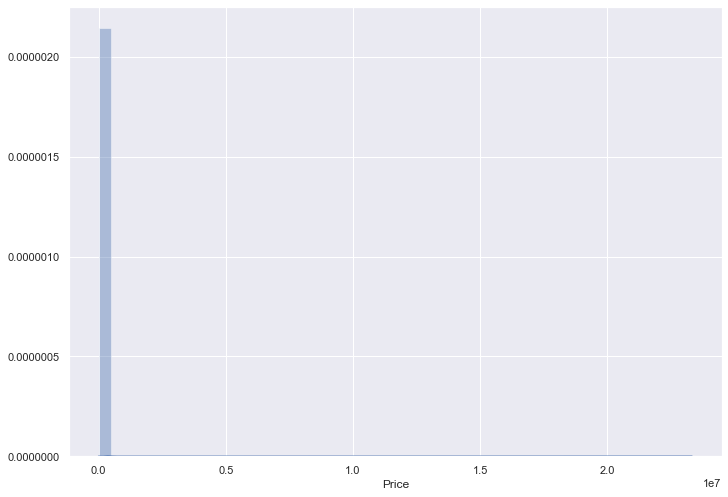

In [24]:
display(sns.distplot(raw_data1['Price']))
display(raw_data1.sort_values('Price',ascending = True).head(10))

Great range of values, upon further investigation we see that the most expensive listing could be a fake one, at over 23 million EUR.

#### Column: Currency

['EUR' 'RON']


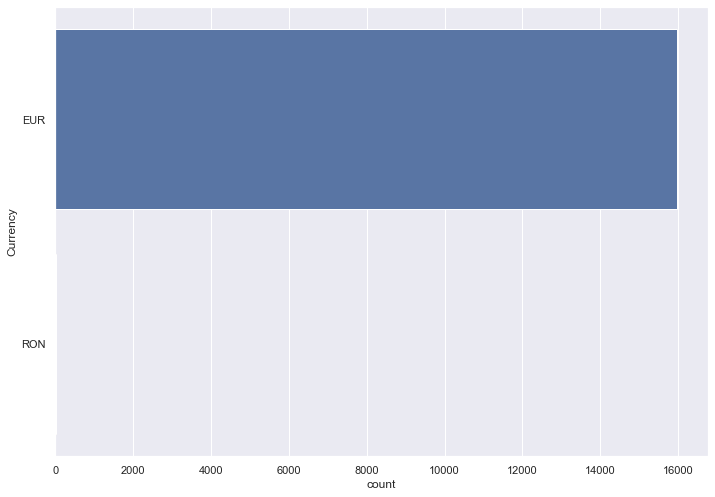

In [25]:
print (raw_data1['Currency'].unique())
display(sns.countplot(y=raw_data1['Currency'],orient='v'))

We can safely remove all listings with RON as currency

#### Column: Location 

In [26]:
raw_data1['Location'].value_counts()

Calea Bucurestilor Nr. 95-97 - 075100 Otopeni, Judet Bucuresti - Ilfov (Romania)    727
Bucuresti, Judet Bucuresti, Sectorul 1                                              385
Cluj-Napoca, Judet Cluj                                                             380
Bucuresti, Judet Bucuresti, Sectorul 3                                              366
Bucuresti, Judet Bucuresti, Sectorul 6                                              312
                                                                                   ... 
Dragalina, Judet Calarasi                                                             1
Oancea, Judet Braila                                                                  1
Drasov, Judet Alba                                                                    1
Neptun, Judet Constanta                                                               1
                                                                                      1
Name: Location, Length: 1203, dt

Great variation in location. Can clean to retain only county/region

## Data cleaning 

#### Considering the above, let's make a todo list for cleaning:
    - segment cars by brand category (budget, luxury, ultra luxury etc)
    - mileage bins for <10km every 20k km (or similar)
    
analysis:
    - per region
        - car stats statistics (price, age, mileage etc) 

First, we can remove all entries that don't have engine size, power, pollution standard, transmission and drive train values. 

In [27]:
data_nomv = raw_data1.dropna(subset=['Engine_size', 'Horsepower', 'Polution_standard', 'Transmission', 'Drivetrain'])

Droplisting with price in RON

In [28]:
data_nomv = data_nomv[data_nomv.Currency != 'RON']

Drop no accident column. We cannot make assumptions about the missing values but the listings themselves have all the other information and can be used for analysis.

In [29]:
data_nomv = data_nomv.drop(columns=['No_accident'])

Then, we can limit the variability of some collumns

In [30]:
data_nomv['Drivetrain'] = data_nomv['Drivetrain'].replace(['4x4\s+\(automat\)', '4x4-manual'],'4x4', regex=True)
data_nomv['Transmission'] = data_nomv['Transmission'].replace(['Automata\s+\(CVT\)', 'Automata\s+\(dublu\s+ambreiaj\)', 'Semi-automata\s+\(secventiala\)'],'Automata', regex=True)

Replacing the whole address with only the county

In [31]:
judete = ['ALBA','ARAD','ARGES','BACAU','BIHOR','BISTRITA','BOTOSANI','BRAILA','BRASOV','BUZAU','BUCURESTI','CALARASI','CARAS','CLUJ','CONSTANTA','COVASNA','DIMBOVITA','DAMBOVITA','DOLJ','GALATI','GIURGIU','GORJ','HARGHITA','HUNEDOARA','IALOMITA','IASI','ILFOV','MARAMURES','MEHEDINTI','MURES','NEAMT','OLT','PRAHOVA','SALAJ','SATU MARE','SIBIU','SUCEAVA','TELEORMAN','TIMIS','TULCEA','VASLUI','VILCEA','VALCEA','VRANCEA']
for index, row in data_nomv.iterrows():  
    in_RO = False
    for judet in judete:
        if judet.lower() in row['Location'].lower():
            data_nomv.at[index,'Location'] = judet
            in_RO = True
    if not in_RO:
        data_nomv = data_nomv.drop(index)               

Replace NaN of registered in RO and service history with 'No'

In [32]:
cols = ['Registered_in_RO', 'Service_history']
data_nomv[cols] = data_nomv[cols].replace(np.nan, 'No', regex=True)
data_nomv[cols] = data_nomv[cols].replace('Da', 'Yes', regex=True)

In [33]:
display(data_nomv.head())
display(data_nomv.describe(include='all'))
display(data_nomv.isnull().sum())

,Make,Model,Version,Body_style,Year,Mileage,Engine_size,Fuel,Horsepower,Polution_standard,Transmission,Drivetrain,Condition,Service_history,Registered_in_RO,Country_of_origin,Seller,Price,Currency,Location
0,Audi,A3,NaN,Masina de oras,2005,"199,494","1,600",Benzina,116,Euro 4,Manuala,Fata,Second hand,Yes,No,Germania,Firma,4299,EUR,TIMIS
1,Nissan,Juke,NaN,SUV,2013,"65,445","1,598",Benzina,117,Euro 5,Automata,Fata,Second hand,Yes,Yes,Germania,Firma,10250,EUR,BUCURESTI
2,Suzuki,Swift,NaN,Masina de oras,2010,"144,000","1,300",Benzina,80,Euro 4,Manuala,Fata,Second hand,Yes,No,Germania,Firma,3999,EUR,TIMIS
3,Mazda,CX-5,NaN,SUV,2014,"154,288","2,200",Diesel,150,Euro 6,Automata,Fata,Second hand,Yes,No,Italia,Firma,11700,EUR,BRAILA
4,Mitsubishi,ASX,NaN,SUV,2012,"162,000","1,800",Diesel,115,Euro 5,Manuala,Fata,Second hand,Yes,No,Belgia,Firma,8900,EUR,BRAILA


,Make,Model,Version,Body_style,Year,Mileage,Engine_size,Fuel,Horsepower,Polution_standard,Transmission,Drivetrain,Condition,Service_history,Registered_in_RO,Country_of_origin,Seller,Price,Currency,Location
count,11307,11307,4144,11307,"11,307","11,307","11,307",11307,"11,307",11307,11307,11307,11307,11307,11307,8244,11307,"11,307",11307,11307
unique,51,495,203,9,nan,nan,nan,5,nan,7,2,3,2,2,2,22,2,nan,1,41
top,Volkswagen,Passat,III,SUV,nan,nan,nan,Diesel,nan,Euro 6,Automata,Fata,Second hand,Yes,No,Germania,Firma,nan,EUR,BUCURESTI
freq,1707,527,341,3745,nan,nan,nan,8754,nan,5659,6565,5547,10733,8436,6855,4658,7741,nan,11307,2749
mean,NaN,NaN,NaN,NaN,"2,014","128,906","2,067",NaN,174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"21,039",NaN,NaN
std,NaN,NaN,NaN,NaN,4,"88,404",640,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"23,967",NaN,NaN
min,NaN,NaN,NaN,NaN,"1,938",1,599,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690,NaN,NaN
25%,NaN,NaN,NaN,NaN,"2,011","55,000","1,600",NaN,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,990",NaN,NaN
50%,NaN,NaN,NaN,NaN,"2,015","140,538","1,991",NaN,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"13,290",NaN,NaN
75%,NaN,NaN,NaN,NaN,"2,017","191,000","2,148",NaN,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"26,500",NaN,NaN


Make                    0
Model                   0
Version              7163
Body_style              0
Year                    0
Mileage                 0
Engine_size             0
Fuel                    0
Horsepower              0
Polution_standard       0
Transmission            0
Drivetrain              0
Condition               0
Service_history         0
Registered_in_RO        0
Country_of_origin    3063
Seller                  0
Price                   0
Currency                0
Location                0
dtype: int64

### Exploratory visualization after preliminary data cleaning

#### Make inspection distribution 

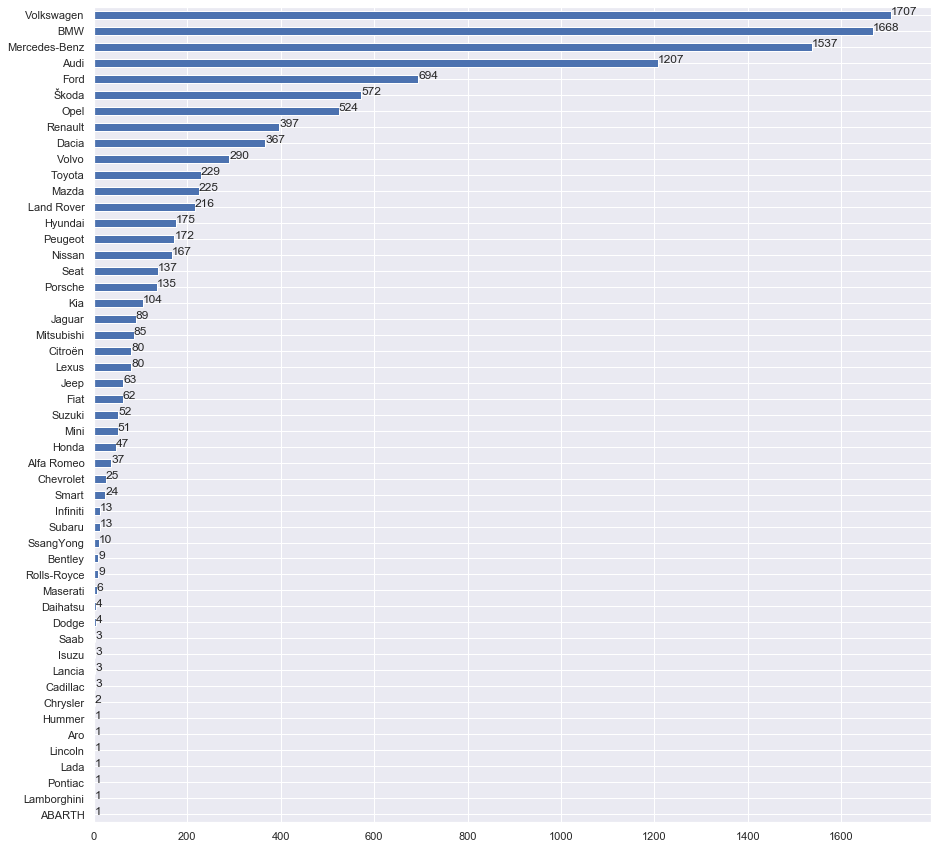

In [34]:
# display(data_nomv['Make'].unique())
ax = data_nomv['Make'].value_counts(ascending=True).plot(kind="barh", figsize=(15,15))
for p in ax.patches:
    b = p.get_bbox()       
    ax.annotate(int(b.x1), ((b.x0 + b.x1), (b.y0 + b.y1)/2))

#### Model inspection distribution

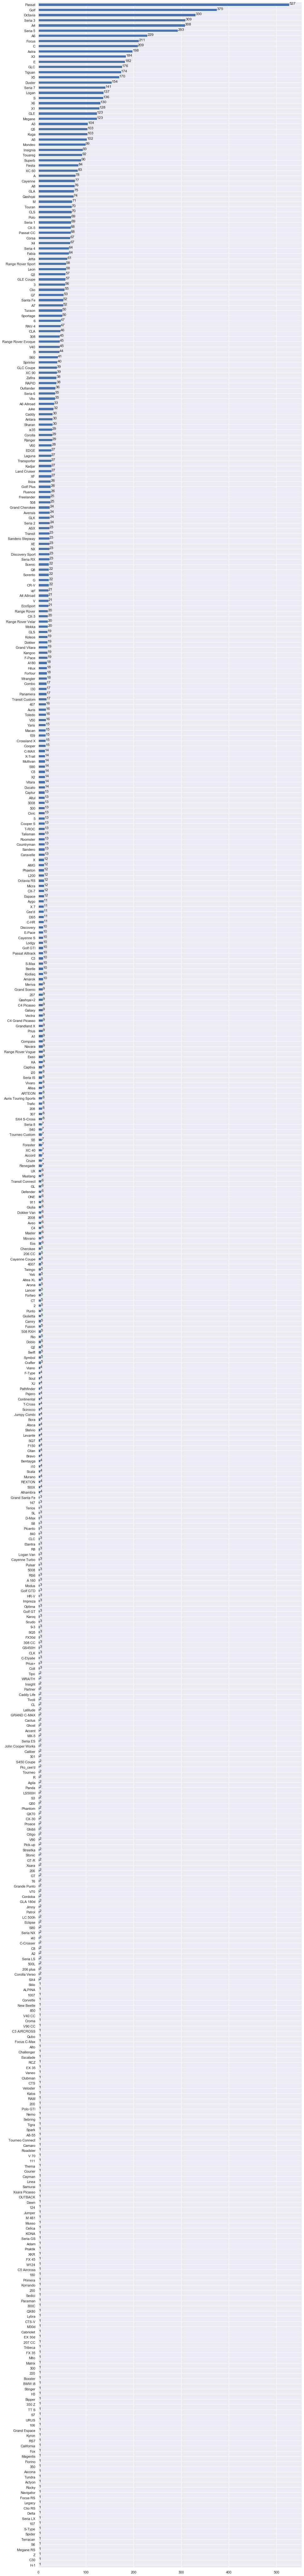

In [35]:
# display(data_nomv['Model'].unique())
ax = data_nomv['Model'].value_counts(ascending=True).plot(kind="barh", figsize=(15,150))
for p in ax.patches:
    b = p.get_bbox()       
    ax.annotate(int(b.x1), ((b.x0 + b.x1), (b.y0 + b.y1)/2))

####  Version inspection distribution

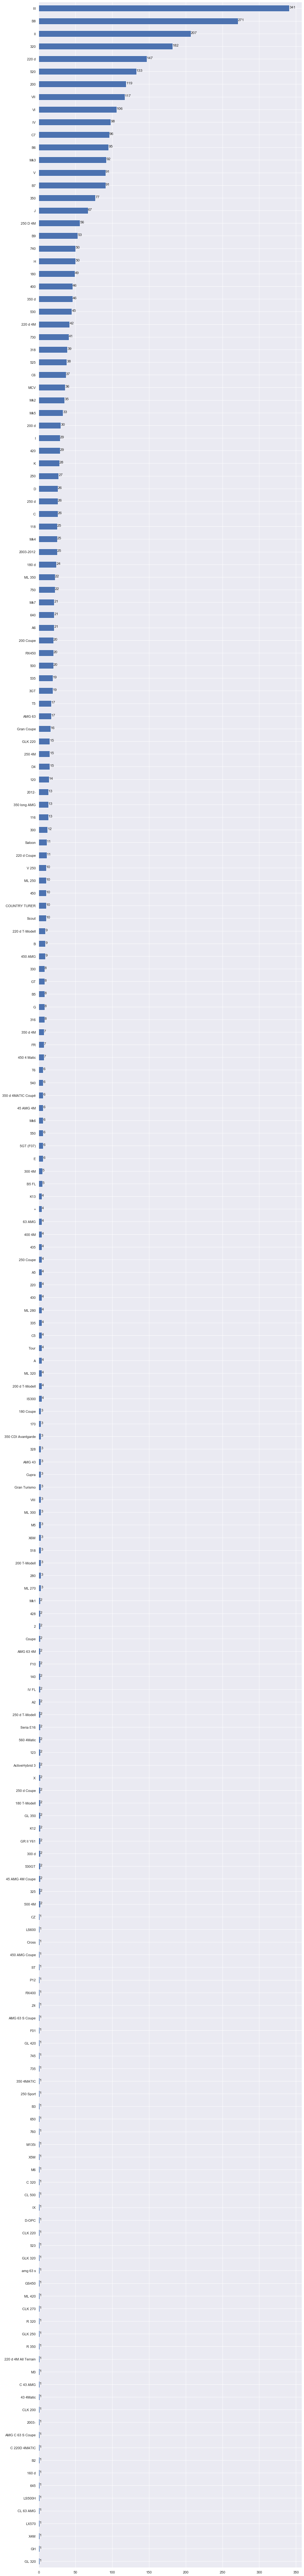

In [36]:
# display(data_nomv['Version'].unique())
ax = data_nomv['Version'].value_counts(ascending=True).plot(kind="barh", figsize=(15,150))
for p in ax.patches:
    b = p.get_bbox()       
    ax.annotate(int(b.x1), ((b.x0 + b.x1), (b.y0 + b.y1)/2))

Some names are spelled differently but refer to the same thing.. We can leave this in and just not use it later. 

#### Body style

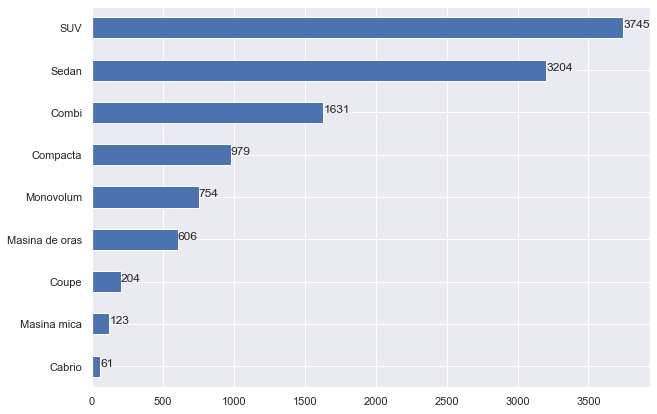

In [37]:
# display(data_nomv['Body_style'].unique())
ax = data_nomv['Body_style'].value_counts(ascending=True).plot(kind="barh", figsize=(10,7))
for p in ax.patches:
    b = p.get_bbox()       
    ax.annotate(int(b.x1), ((b.x0 + b.x1), (b.y0 + b.y1)/2))

#### Year

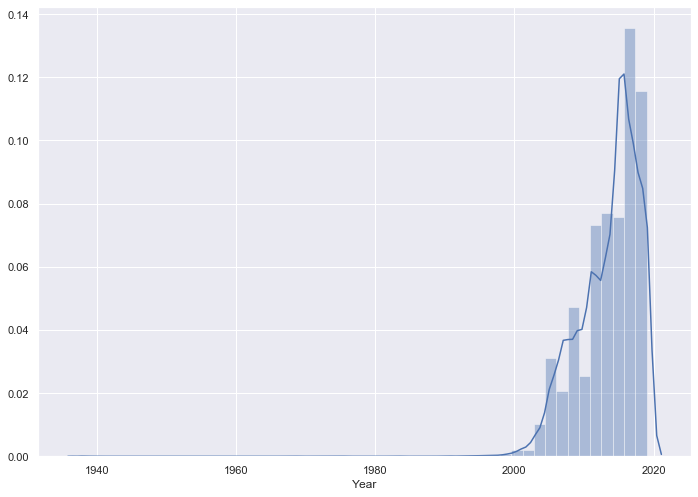

In [38]:
display(sns.distplot(data_nomv['Year']))

#### Mileage

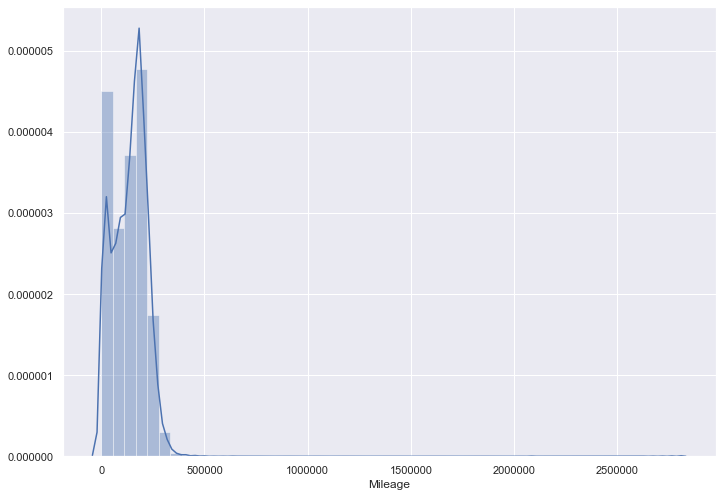

In [39]:
display(sns.distplot(data_nomv['Mileage']))

#### Engine size 

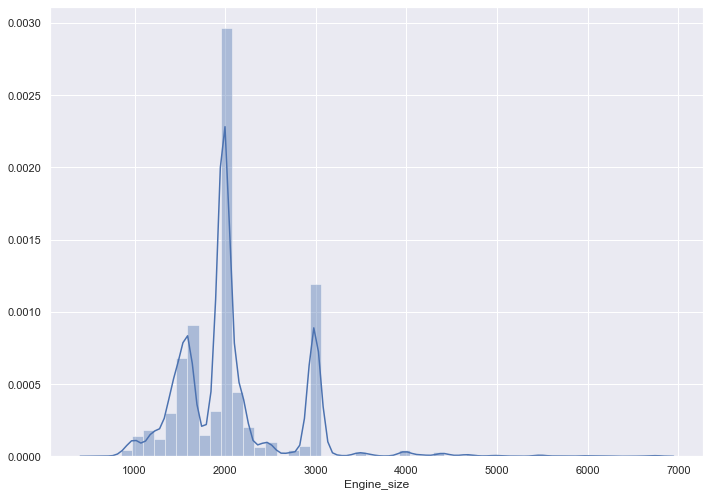

In [41]:
display(sns.distplot(data_nomv['Engine_size']))

#### Fuel 

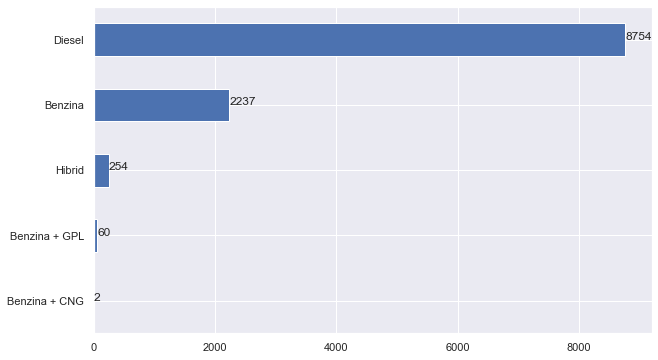

In [42]:
# display(data_nomv['Fuel'].unique())
ax = data_nomv['Fuel'].value_counts(ascending=True).plot(kind="barh", figsize=(10,6))
for p in ax.patches:
    b = p.get_bbox()       
    ax.annotate(int(b.x1), ((b.x0 + b.x1), (b.y0 + b.y1)/2))

#### Horsepower 

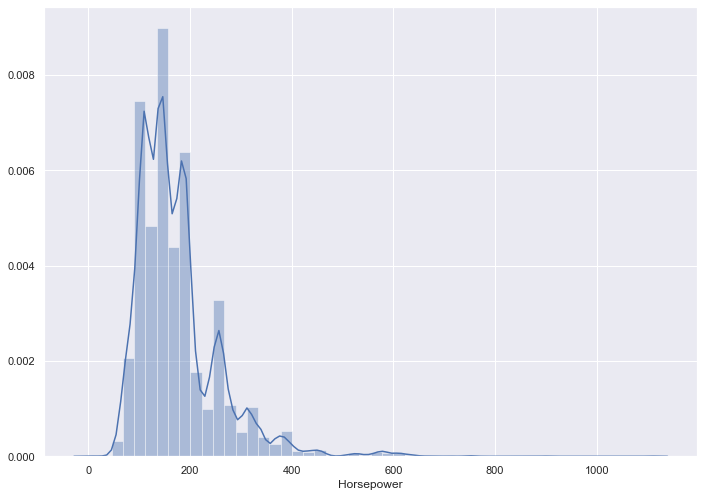

In [43]:
display(sns.distplot(data_nomv['Horsepower']))

#### Polution standard 

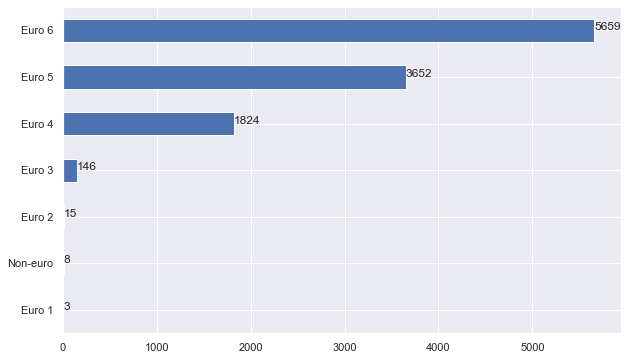

In [44]:
# display(data_nomv['Polution_standard'].unique())
ax = data_nomv['Polution_standard'].value_counts(ascending=True).plot(kind="barh", figsize=(10,6))
for p in ax.patches:
    b = p.get_bbox()       
    ax.annotate(int(b.x1), ((b.x0 + b.x1), (b.y0 + b.y1)/2))

#### Transmission 

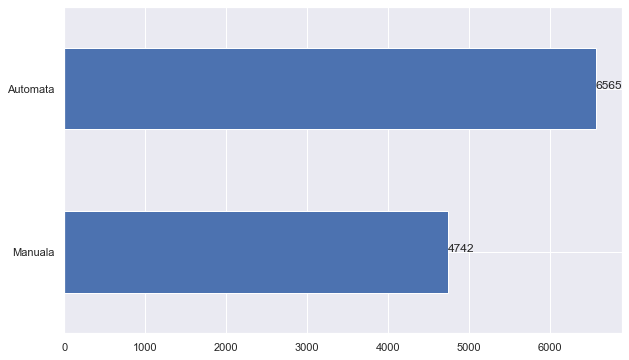

In [45]:
# display(data_nomv['Transmission'].unique())
ax = data_nomv['Transmission'].value_counts(ascending=True).plot(kind="barh", figsize=(10,6))
for p in ax.patches:
    b = p.get_bbox()       
    ax.annotate(int(b.x1), ((b.x0 + b.x1), (b.y0 + b.y1)/2))

#### Drivetrain 

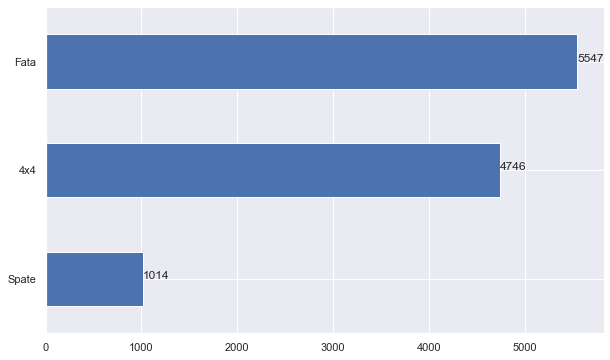

In [46]:
# display(data_nomv['Drivetrain'].unique())
ax = data_nomv['Drivetrain'].value_counts(ascending=True).plot(kind="barh", figsize=(10,6))
for p in ax.patches:
    b = p.get_bbox()       
    ax.annotate(int(b.x1), ((b.x0 + b.x1), (b.y0 + b.y1)/2))

#### Condition 

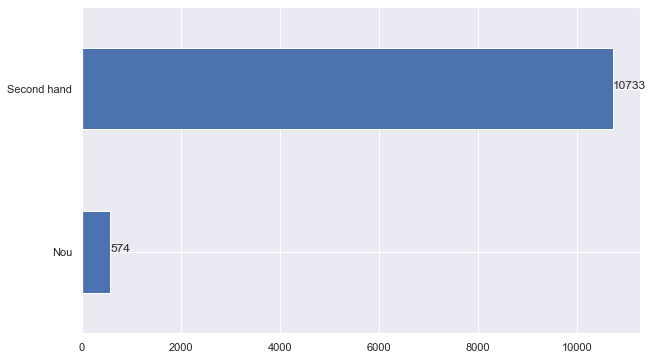

In [47]:
ax = data_nomv['Condition'].value_counts(ascending=True).plot(kind="barh", figsize=(10,6))
for p in ax.patches:
    b = p.get_bbox()       
    ax.annotate(int(b.x1), ((b.x0 + b.x1), (b.y0 + b.y1)/2))

#### Service history

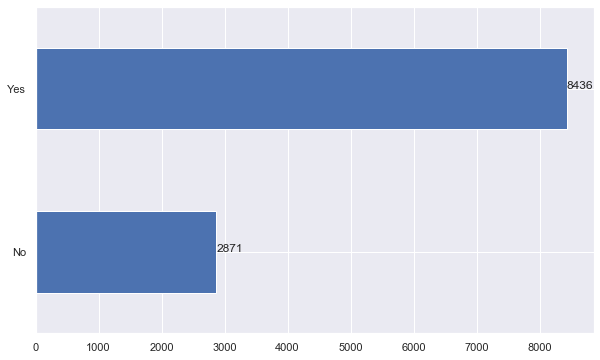

In [48]:
ax = data_nomv['Service_history'].value_counts(ascending=True).plot(kind="barh", figsize=(10,6))
for p in ax.patches:
    b = p.get_bbox()       
    ax.annotate(int(b.x1), ((b.x0 + b.x1), (b.y0 + b.y1)/2))

#### Registered in RO

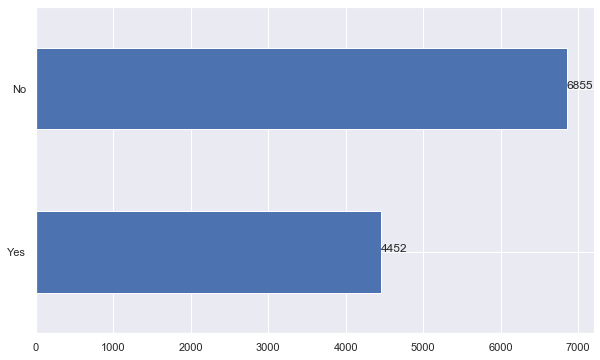

In [49]:
ax = data_nomv['Registered_in_RO'].value_counts(ascending=True).plot(kind="barh", figsize=(10,6))
for p in ax.patches:
    b = p.get_bbox()       
    ax.annotate(int(b.x1), ((b.x0 + b.x1), (b.y0 + b.y1)/2))

#### Country of origin 

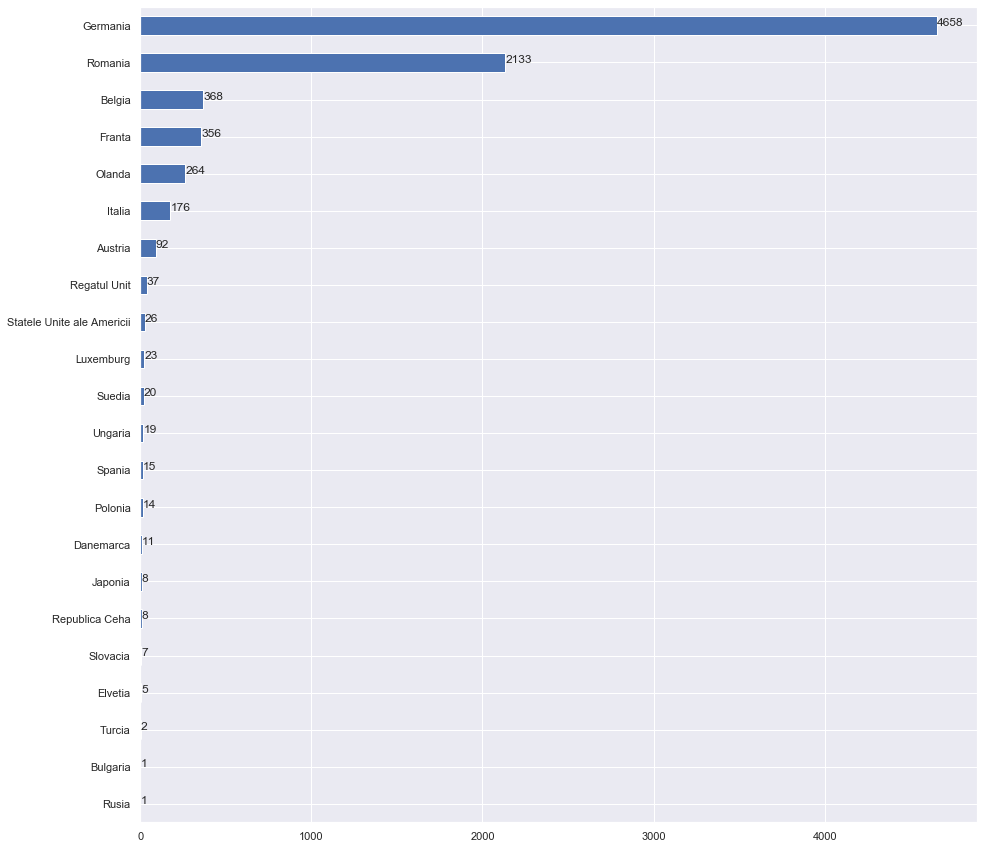

In [50]:
ax = data_nomv['Country_of_origin'].value_counts(ascending=True).plot(kind="barh", figsize=(15,15))
for p in ax.patches:
    b = p.get_bbox()       
    ax.annotate(int(b.x1), ((b.x0 + b.x1), (b.y0 + b.y1)/2))

#### Seller

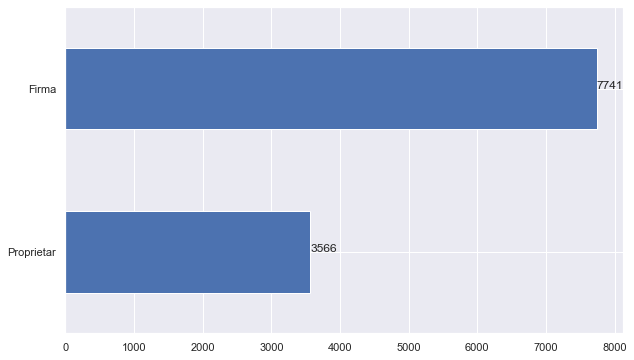

In [51]:
ax = data_nomv['Seller'].value_counts(ascending=True).plot(kind="barh", figsize=(10,6))
for p in ax.patches:
    b = p.get_bbox()       
    ax.annotate(int(b.x1), ((b.x0 + b.x1), (b.y0 + b.y1)/2))

#### Price 

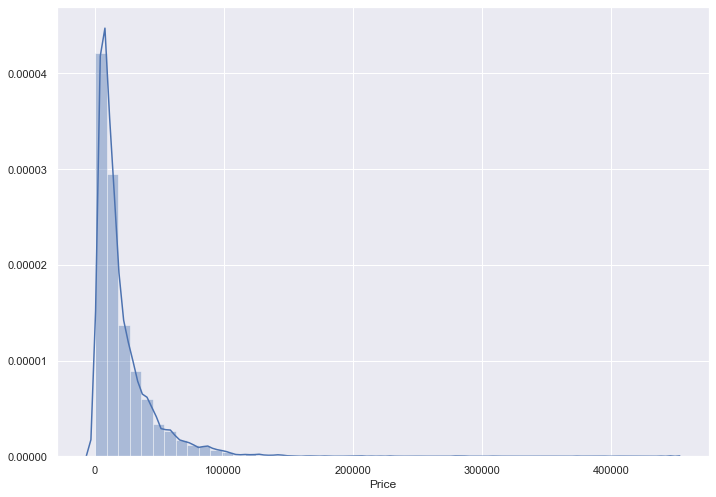

In [52]:
display(sns.distplot(data_nomv['Price']))

#### Location 

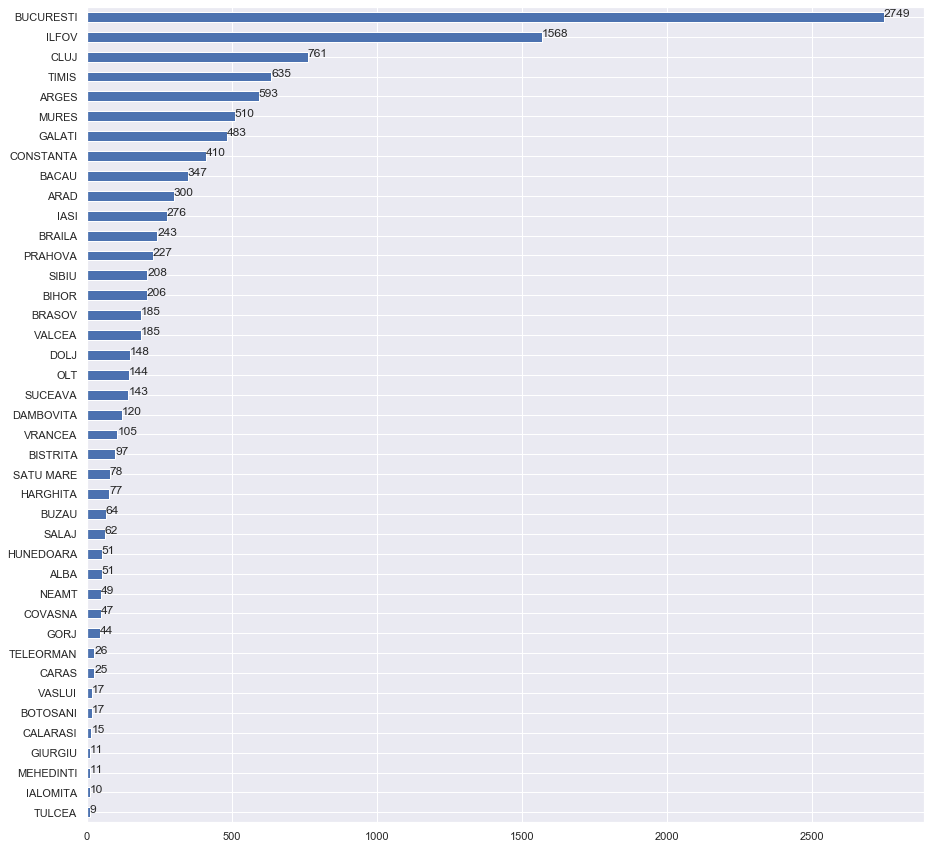

In [53]:
ax = data_nomv['Location'].value_counts(ascending=True).plot(kind="barh", figsize=(15,15))
for p in ax.patches:
    b = p.get_bbox()       
    ax.annotate(int(b.x1), ((b.x0 + b.x1), (b.y0 + b.y1)/2))

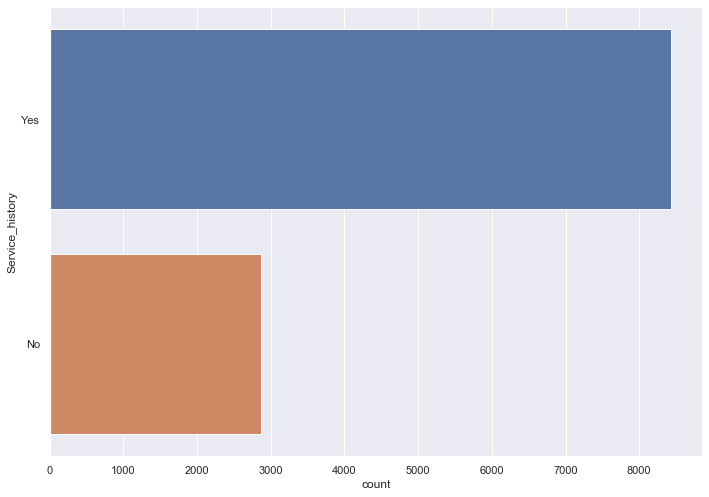

In [54]:
display(sns.countplot(y=data_nomv['Service_history'],orient='v'))

In [55]:
data_nomv.sort_values('Price',ascending = False).head(10)

,Make,Model,Version,Body_style,Year,Mileage,Engine_size,Fuel,Horsepower,Polution_standard,Transmission,Drivetrain,Condition,Service_history,Registered_in_RO,Country_of_origin,Seller,Price,Currency,Location
9125,Rolls-Royce,Phantom,NaN,Sedan,2018,"2,960","6,749",Benzina,571,Euro 6,Automata,Spate,Second hand,Yes,Yes,Germania,Firma,446250,EUR,BUCURESTI
9656,Rolls-Royce,Altul,NaN,SUV,2019,"2,500","6,749",Benzina,571,Euro 6,Automata,4x4,Second hand,Yes,Yes,Germania,Firma,406414,EUR,BUCURESTI
9495,Rolls-Royce,Altul,NaN,SUV,2019,"25,000","6,749",Benzina,571,Euro 6,Automata,4x4,Second hand,Yes,Yes,Germania,Firma,392700,EUR,BUCURESTI
9323,Rolls-Royce,Phantom,NaN,Sedan,2018,"18,600","6,749",Benzina,571,Euro 6,Automata,Spate,Second hand,Yes,Yes,Germania,Firma,386750,EUR,BUCURESTI
9133,Rolls-Royce,Ghost,NaN,Sedan,2018,1,"6,749",Benzina,571,Euro 6,Automata,Spate,Nou,No,No,Germania,Firma,374850,EUR,BUCURESTI
9160,Rolls-Royce,WRAITH,NaN,Coupe,2019,"15,000","6,749",Benzina,632,Euro 6,Automata,Spate,Second hand,Yes,Yes,Germania,Firma,309400,EUR,BUCURESTI
9203,Rolls-Royce,Dawn,NaN,Cabrio,2018,"4,780","6,749",Benzina,571,Euro 6,Automata,Spate,Second hand,Yes,Yes,Germania,Firma,285600,EUR,BUCURESTI
4436,Bentley,Continental,NaN,Coupe,2019,1,"5,950",Benzina,635,Euro 6,Automata,4x4,Nou,No,No,NaN,Firma,284291,EUR,ILFOV
12416,Bentley,Continental,NaN,Coupe,2019,1,"5,998",Benzina,635,Euro 6,Automata,4x4,Nou,No,No,NaN,Firma,280721,EUR,ILFOV
11335,Lamborghini,URUS,NaN,SUV,2019,"9,900","3,996",Benzina,650,Euro 6,Automata,4x4,Second hand,No,No,NaN,Firma,279998,EUR,OLT


In [56]:
data_nomv.loc[data_nomv['Mileage'] == 0]

,Make,Model,Version,Body_style,Year,Mileage,Engine_size,Fuel,Horsepower,Polution_standard,Transmission,Drivetrain,Condition,Service_history,Registered_in_RO,Country_of_origin,Seller,Price,Currency,Location


In [57]:
data_nomv[data_nomv['Mileage'].isnull()]

,Make,Model,Version,Body_style,Year,Mileage,Engine_size,Fuel,Horsepower,Polution_standard,Transmission,Drivetrain,Condition,Service_history,Registered_in_RO,Country_of_origin,Seller,Price,Currency,Location


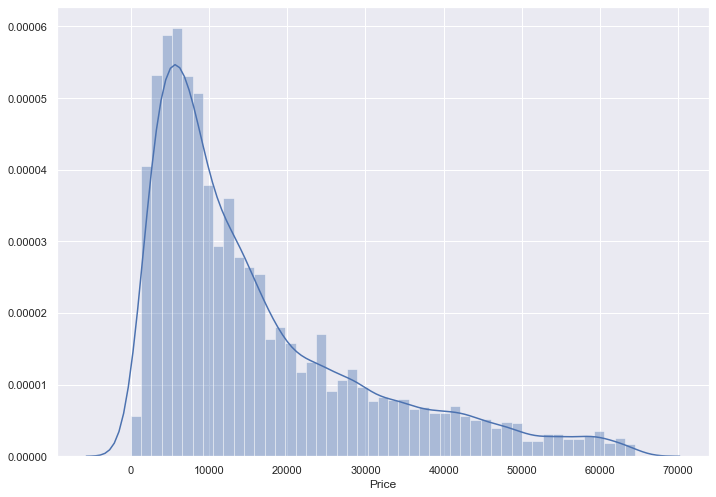

In [58]:
q = raw_data1['Price'].quantile(0.95)
data_1 = raw_data1[raw_data1['Price']<q]
sns.distplot(data_1['Price'])